In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings as wr 

In [2]:
customer = pd.read_csv("data/Mall_Customers.csv")

In [3]:
print(customer.shape)
print(customer.head())
print(customer.describe())
print(customer.info())

(200, 5)
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.0000

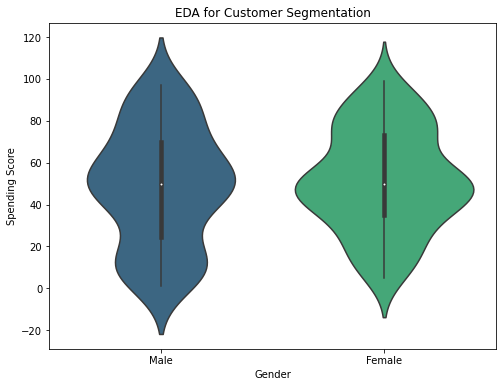

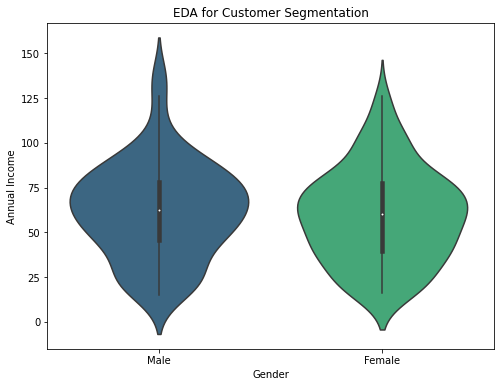

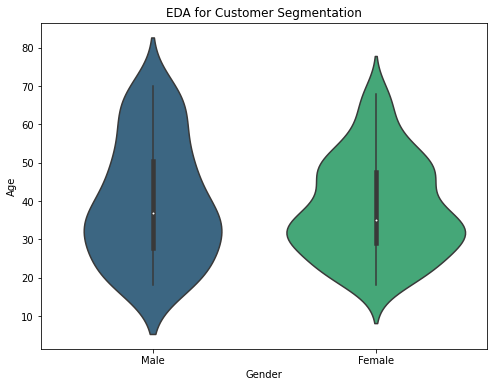

In [4]:
# Assuming 'df' is your DataFrame 
plt.figure(figsize=(8,6)) 
  
# Using Seaborn to create a swarm plot 
sns.violinplot(x="Gender", y="Spending Score (1-100)", data=customer, palette='viridis') 
  
plt.title('EDA for Customer Segmentation') 
plt.xlabel('Gender') 
plt.ylabel('Spending Score') 
plt.show()

plt.figure(figsize=(8,6)) 

# Using Seaborn to create a swarm plot 
sns.violinplot(x="Gender", y="Annual Income (k$)", data=customer, palette='viridis') 
  
plt.title('EDA for Customer Segmentation') 
plt.xlabel('Gender') 
plt.ylabel('Annual Income') 
plt.show()

plt.figure(figsize=(8,6)) 

# Using Seaborn to create a swarm plot 
sns.violinplot(x="Gender", y="Age", data=customer, palette='viridis') 
  
plt.title('EDA for Customer Segmentation') 
plt.xlabel('Gender') 
plt.ylabel('Age') 
plt.show()

This shows that the difference in age, score, and income between male and female customers is insignificant, so we will lump all customers together, not taking into account their gender. For this specific analysis.

In [5]:
x = customer[["Age","Annual Income (k$)","Spending Score (1-100)"]]
# Calculate inertia (sum of squared distances) for different values of k
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init= 10, random_state=42)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)

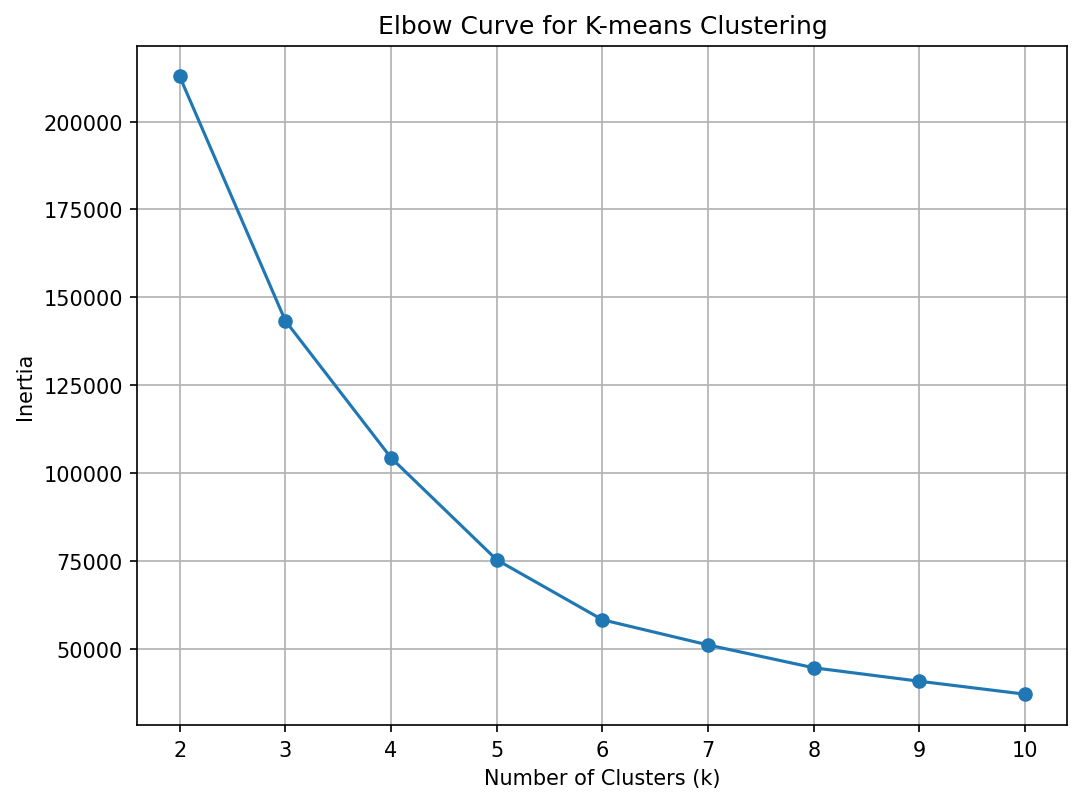

In [6]:
# Plot the elbow curve
plt.figure(figsize=(8, 6),dpi=150)
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve for K-means Clustering')
plt.grid(True)
plt.show()

In [8]:
best_kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)
customer['Cluster'] = best_kmeans.fit_predict(x)

In [9]:
# Group by cluster and calculate mean values
cluster_summary = customer.groupby('Cluster').agg({
    'Age': 'mean',
    'Spending Score (1-100)': 'mean',
    'Annual Income (k$)': 'mean'
}).reset_index()

In [10]:
print(cluster_summary)

   Cluster        Age  Spending Score (1-100)  Annual Income (k$)
0        0  45.217391               20.913043           26.304348
1        1  43.088608               49.569620           55.291139
2        2  32.692308               82.128205           86.538462
3        3  40.666667               17.583333           87.750000
4        4  25.521739               78.565217           26.304348


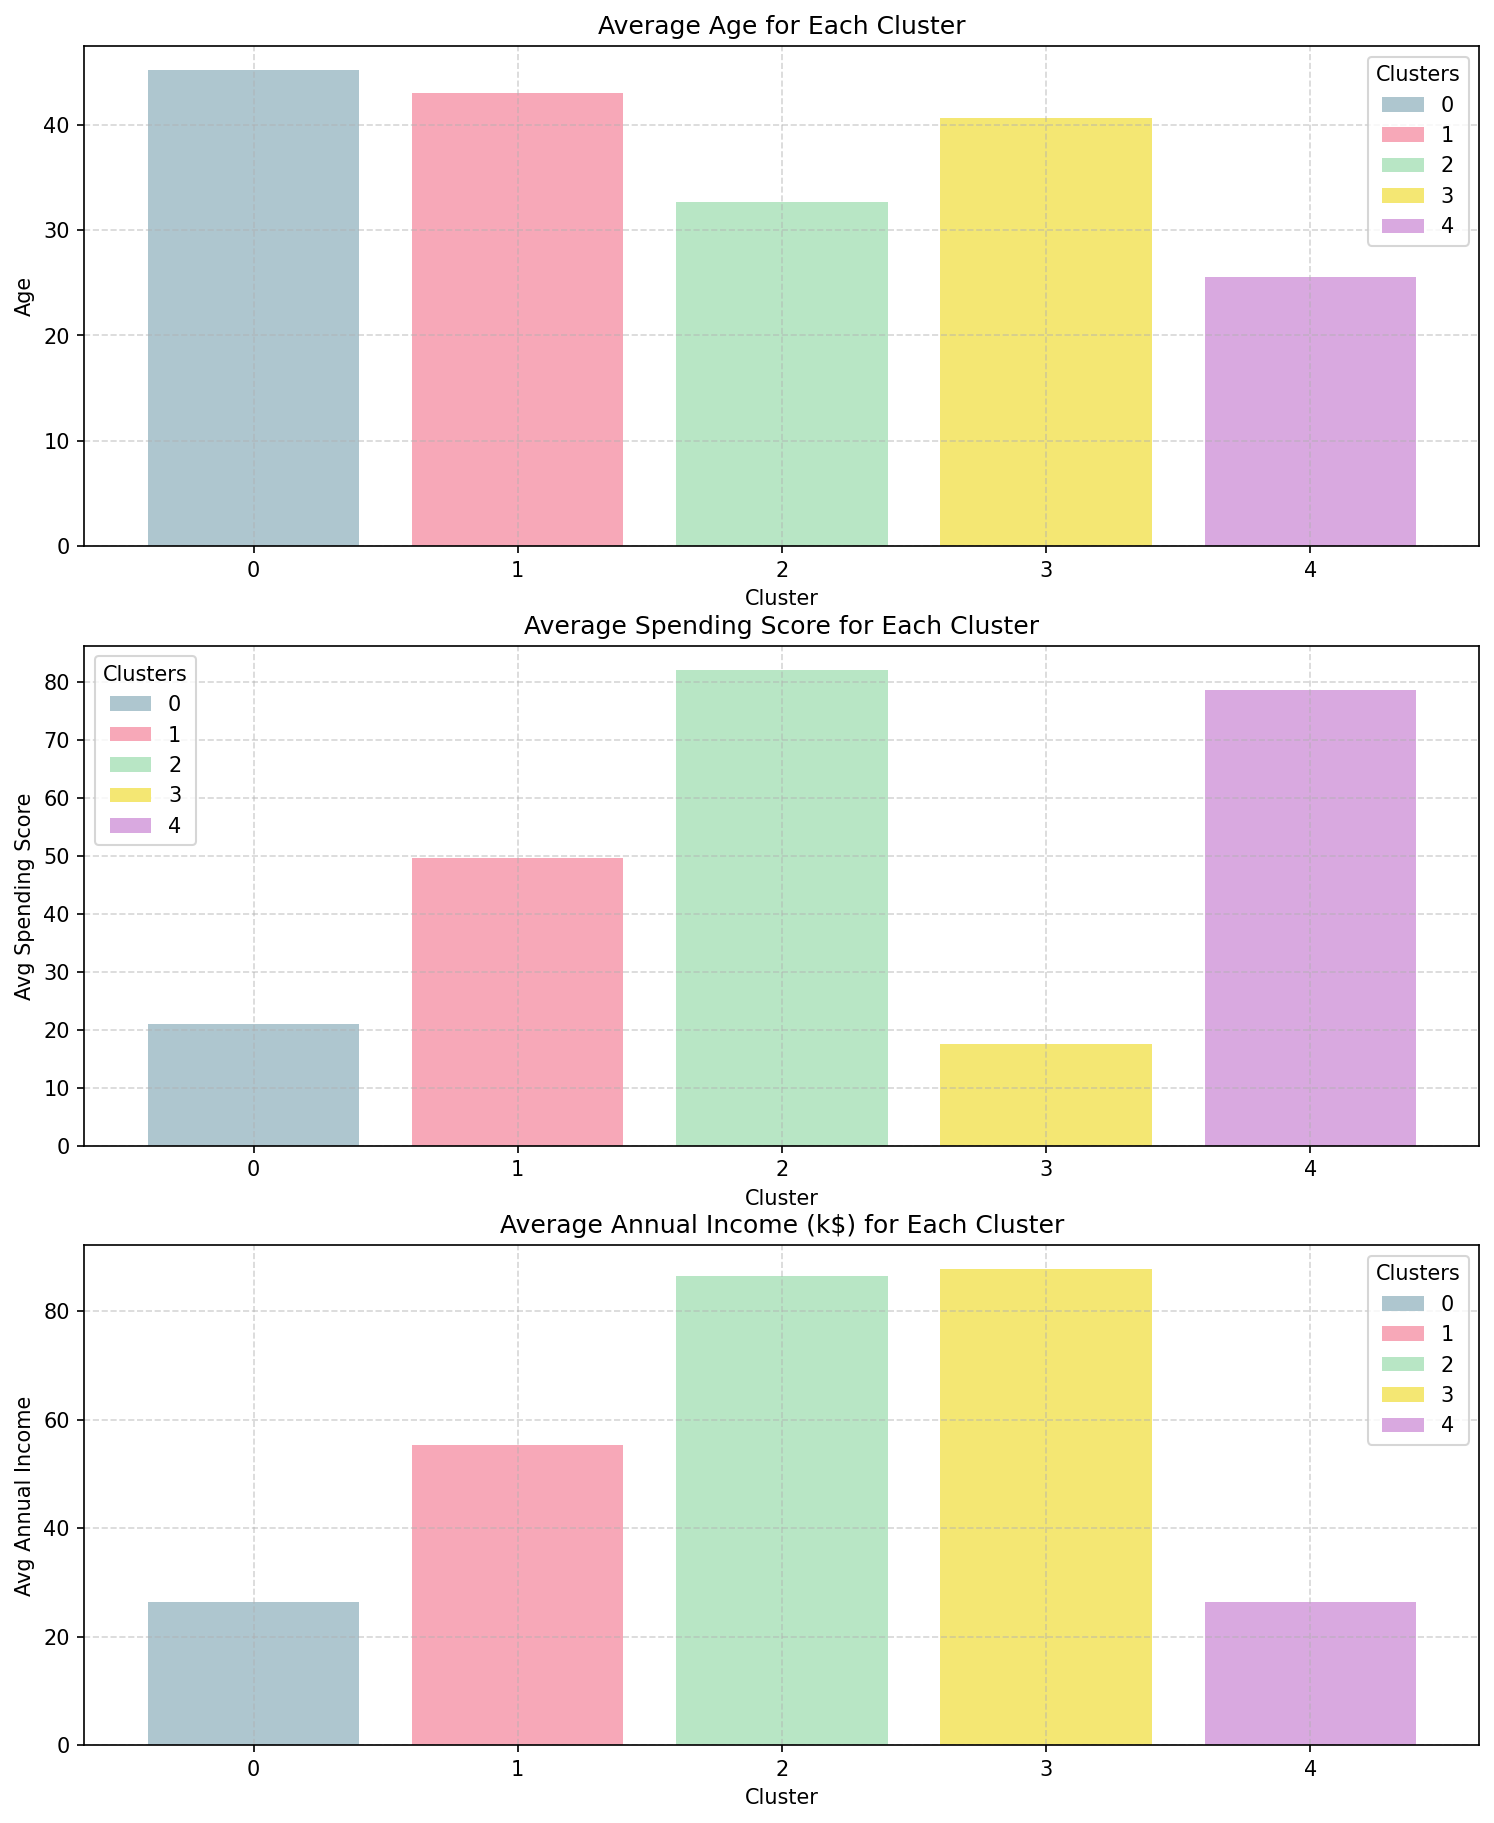

In [18]:
colors = ["#aec6cf", "#f7a8b8" , "#b8e6c5", "#f4e773", "#d9a9e0"]

# Plot the average RFM scores for each cluster
plt.figure(figsize=(12, 15),dpi=150)

# Plot Avg Age
plt.subplot(3, 1, 1)
bars = plt.bar(cluster_summary.index, cluster_summary['Age'], color = colors)
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.title('Average Age for Each Cluster')

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bars, cluster_summary.index, title='Clusters')

# Plot Avg Score
plt.subplot(3, 1, 2)
bars = plt.bar(cluster_summary.index, cluster_summary['Spending Score (1-100)'], color = colors)
plt.xlabel('Cluster')
plt.ylabel('Avg Spending Score')
plt.title('Average Spending Score for Each Cluster')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bars, cluster_summary.index, title='Clusters')

# Plot Avg Income
plt.subplot(3, 1, 3)
bars = plt.bar(cluster_summary.index, cluster_summary['Annual Income (k$)'], color = colors)
plt.xlabel('Cluster')
plt.ylabel('Avg Annual Income')
plt.title('Average Annual Income (k$) for Each Cluster')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bars, cluster_summary.index, title='Clusters')


Cluster 0: Older customers, that tend to spend less. This group are your casual every-so-often shoppers.

Cluster 1: Older customers, that tend to spend more. This group is your average shopper in frequency and amount. 

Cluster 2: Middle-aged, with the highest spending habits and capability. This group are your high rollers, who are willing to spend the money. 

Cluster 3: Older cusomers, who have the ability but are unwilling to spend money. This group are your stubborn customers, only willing to commit to marginal purchases. 

Cluster 4: The youngest group of customers, who spend the largest percentage of their income at this store. These are the customers who most likely have the highest sense of brand loyalty. 

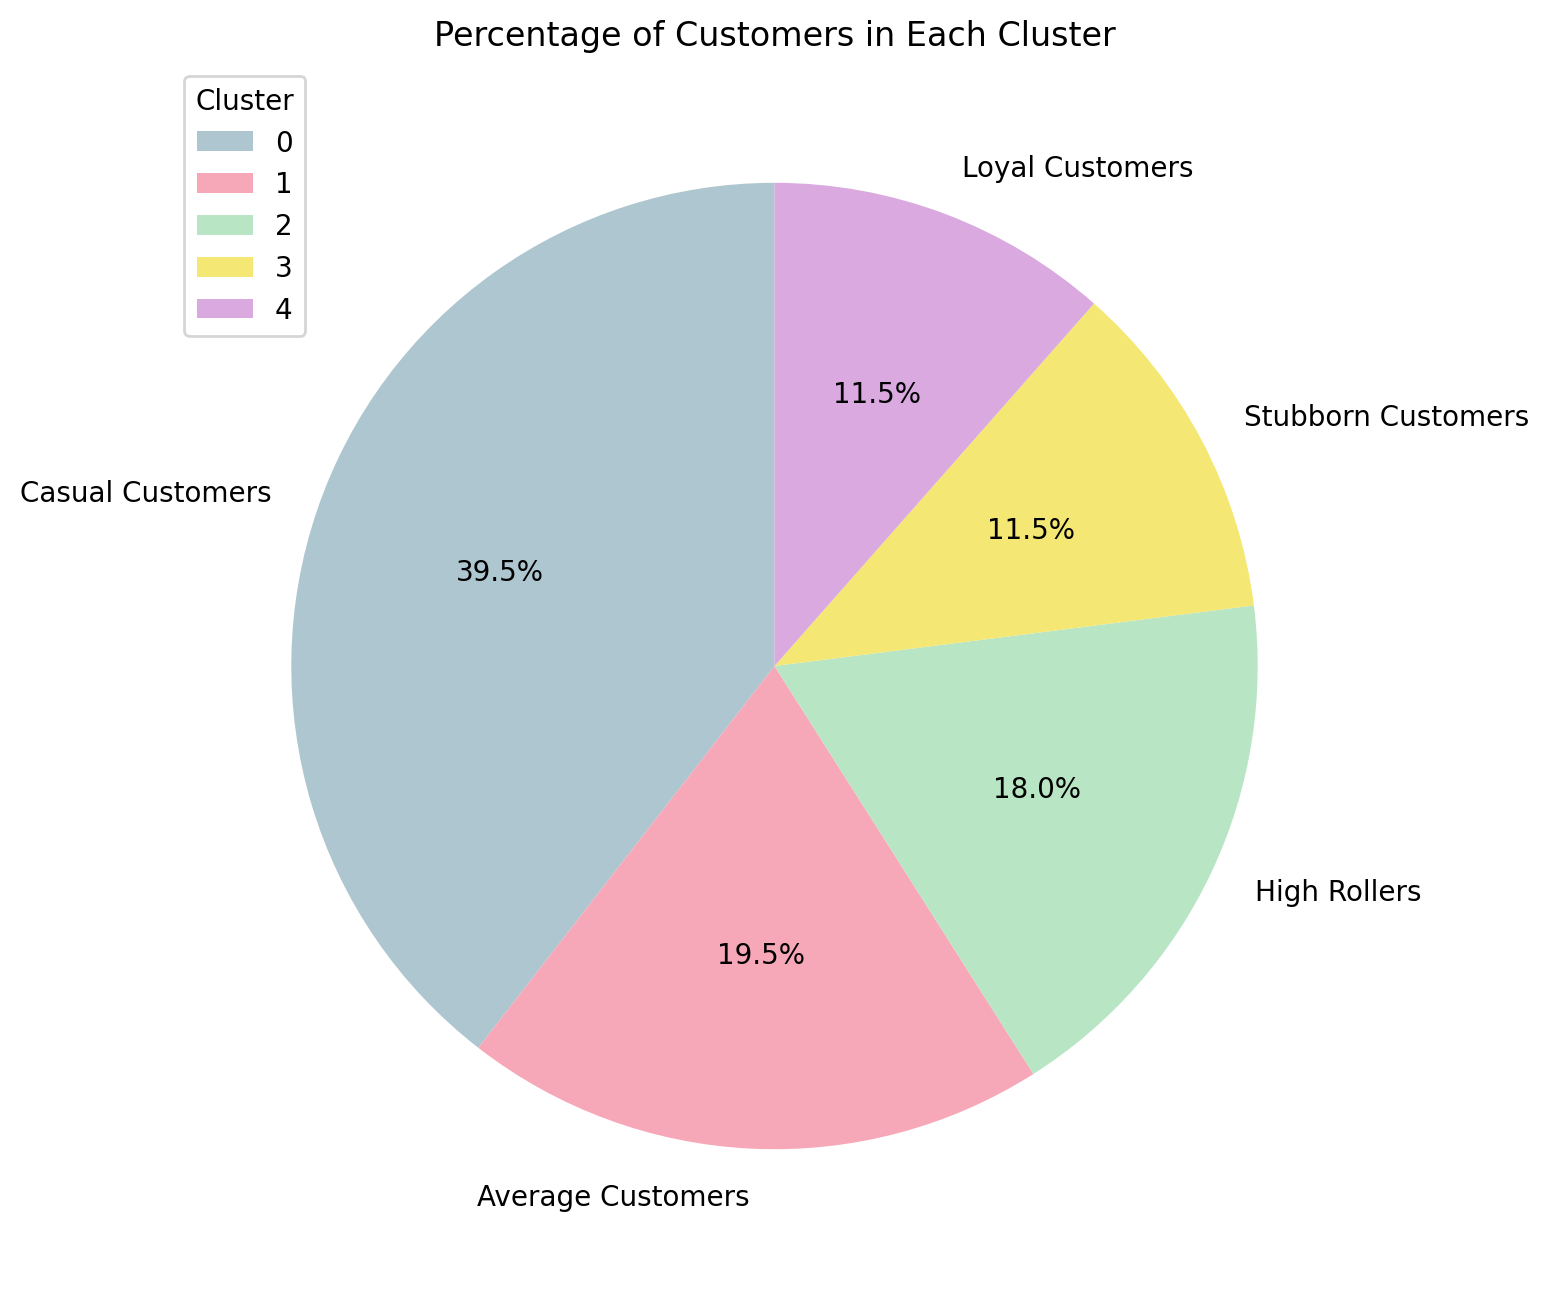

In [19]:
cluster_counts = customer['Cluster'].value_counts()

colors = ["#aec6cf", "#f7a8b8" , "#b8e6c5", "#f4e773", "#d9a9e0"]
# Calculate the total number of customers
total_customers = cluster_counts.sum()

# Calculate the percentage of customers in each cluster
percentage_customers = (cluster_counts / total_customers) * 100

labels = ['Casual Customers','Average Customers','High Rollers',
          'Stubborn Customers','Loyal Customers']

# Create a pie chart
plt.figure(figsize=(8, 8),dpi=200)
plt.pie(percentage_customers, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Percentage of Customers in Each Cluster')
plt.legend(cluster_summary['Cluster'], title='Cluster', loc='upper left')

plt.show()